In [53]:
import pandas as pd

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
import joblib
warnings.filterwarnings("ignore")


In [54]:
import sklearn
print(sklearn.__version__)


1.2.2


In [55]:
df= pd.read_csv('train.csv')

In [56]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [58]:
df.isnull().sum().head(50)

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType       872
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [59]:
df.isnull().sum().tail(30)

BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive          0
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal             0
MoSold              0
YrSold              0
SaleType            0
SaleCondition       0
SalePrice           0
dtype: int64

In [60]:

X = df.drop(['SalePrice','Id'],axis= 1)
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [61]:
y = df['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [62]:
import numpy as np

In [63]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())

# Filling NaNs for categorical columns with 'NA'
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].fillna('NA')




In [64]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [65]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [13]:
X.isnull().sum().head(30)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
dtype: int64

In [66]:

scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

<Axes: >

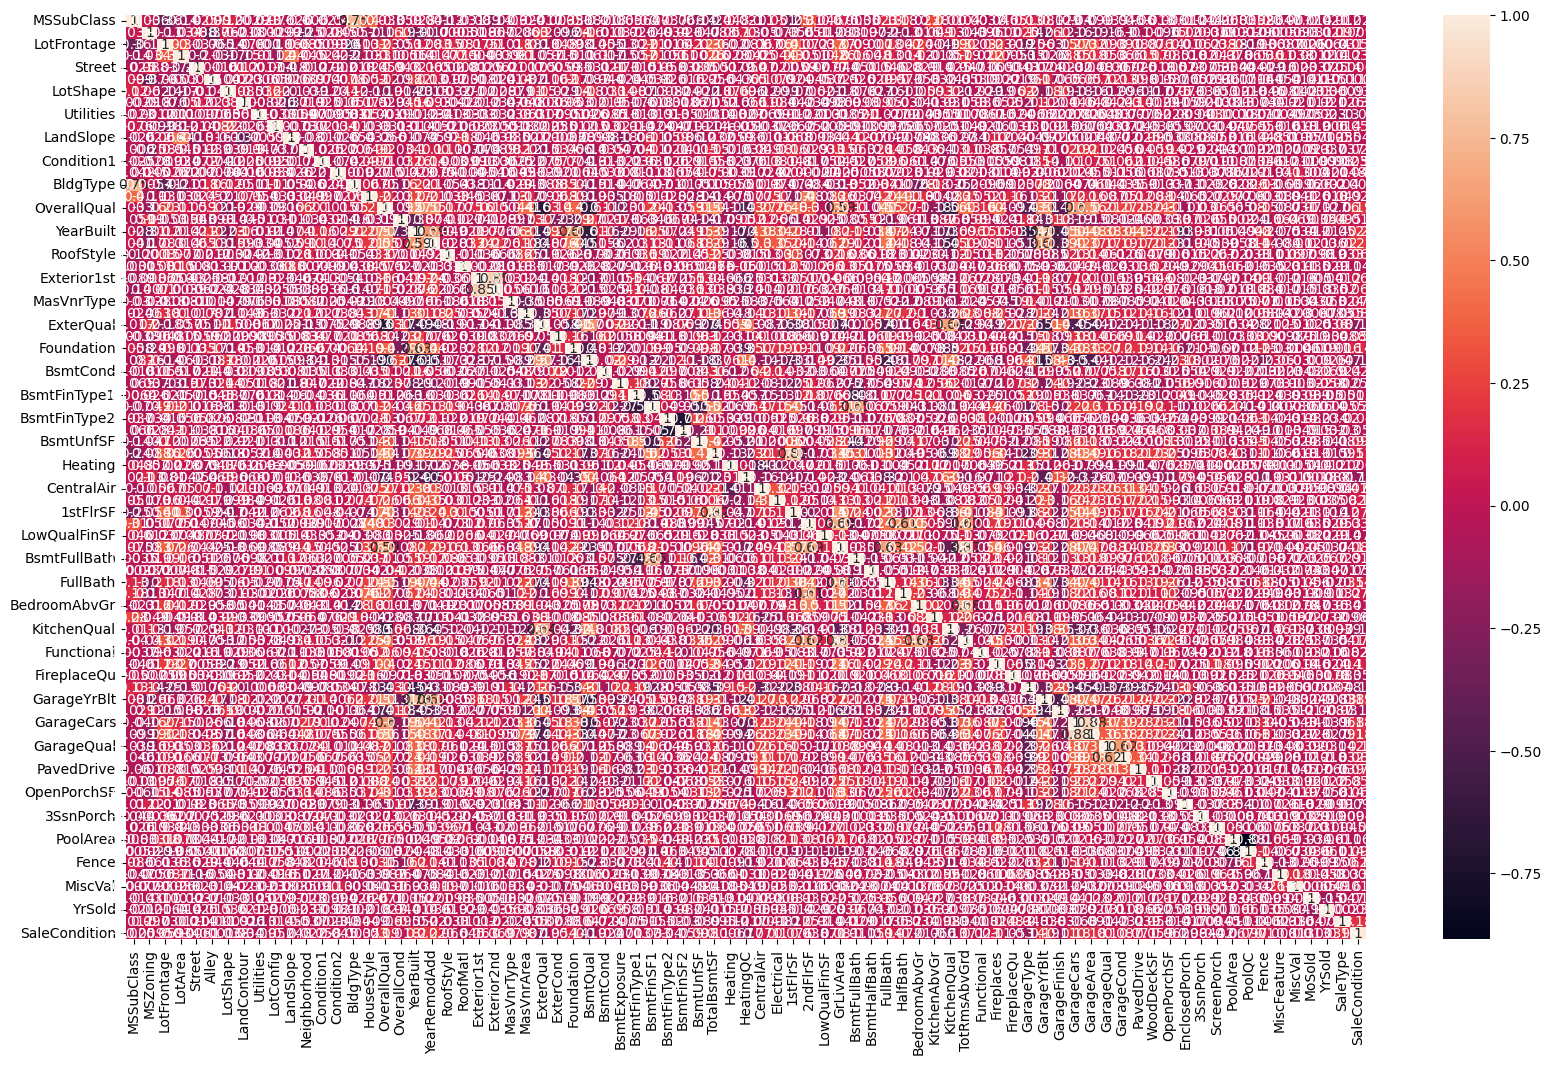

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,12))
sns.heatmap(X.corr(),annot=True)

In [67]:
# Step 1: Calculate the correlation matrix
corr_matrix = X.corr().abs()

# Step 2: Create an upper triangle matrix to avoid duplicate pairs
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Step 3: Identify columns to drop based on the correlation threshold
threshold = 0.7
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Step 4: Drop the highly correlated columns
df_selected = X.drop(columns=to_drop)

# The number of features has been reduced
print(f"Original number of features: {df.shape[1]}")
print(f"Number of features after removing highly correlated ones: {df_selected.shape[1]}")

Original number of features: 81
Number of features after removing highly correlated ones: 71


In [68]:
df_selected.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,3,-0.220875,-0.207142,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,0.138777,8,4
1,-0.872563,3,0.460320,-0.091886,1,1,3,3,0,2,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-0.489110,-0.614439,8,4
2,0.073375,3,-0.084636,0.073480,1,1,0,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,0.990891,0.138777,8,4
3,0.309859,3,-0.447940,-0.096897,1,1,0,3,0,0,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,-1.367655,8,0
4,0.073375,3,0.641972,0.375148,1,1,0,3,0,2,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,2.100892,0.138777,8,4


In [18]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   float64
 4   Street         1460 non-null   int64  
 5   Alley          1460 non-null   int64  
 6   LotShape       1460 non-null   int64  
 7   LandContour    1460 non-null   int64  
 8   Utilities      1460 non-null   int64  
 9   LotConfig      1460 non-null   int64  
 10  LandSlope      1460 non-null   int64  
 11  Neighborhood   1460 non-null   int64  
 12  Condition1     1460 non-null   int64  
 13  Condition2     1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   float64
 16  OverallCond    1460 non-null   float64
 17  YearBuilt      1460 non-null   float64
 18  YearRemo

In [19]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [69]:
df_selected

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,3,-0.220875,-0.207142,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,0.138777,8,4
1,-0.872563,3,0.460320,-0.091886,1,1,3,3,0,2,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-0.489110,-0.614439,8,4
2,0.073375,3,-0.084636,0.073480,1,1,0,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,0.990891,0.138777,8,4
3,0.309859,3,-0.447940,-0.096897,1,1,0,3,0,0,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,-1.367655,8,0
4,0.073375,3,0.641972,0.375148,1,1,0,3,0,2,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,2.100892,0.138777,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,3,-0.357114,-0.260560,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,0.620891,-0.614439,8,4
1456,-0.872563,3,0.687385,0.266407,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,2,1,-0.087688,-1.599111,1.645210,8,4
1457,0.309859,3,-0.175462,-0.147810,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,0,3,4.953112,-0.489110,1.645210,8,4
1458,-0.872563,3,-0.084636,-0.080160,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-0.859110,1.645210,8,4


In [72]:
X = df_selected
y = df['SalePrice']

In [73]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'Fence',
       'MiscF

In [74]:
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = X[numerical_cols].fillna(X[numerical_cols].median())

# Filling NaNs for categorical columns with 'NA'
categorical_cols = X.select_dtypes(include=['object']).columns
X[categorical_cols] = X[categorical_cols].fillna('NA')



In [75]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

In [76]:
X.isnull().sum().head(40)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
2ndFlrSF        0
dtype: int64

In [100]:
df_selected.iloc[:,60:72]

,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,-0.359325,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,0.138777,8,4
1,-0.359325,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-0.489110,-0.614439,8,4
2,-0.359325,-0.116339,-0.270208,-0.068692,4,1,-0.087688,0.990891,0.138777,8,4
3,4.092524,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,-1.367655,8,0
4,-0.359325,-0.116339,-0.270208,-0.068692,4,1,-0.087688,2.100892,0.138777,8,4
...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.359325,-0.116339,-0.270208,-0.068692,4,1,-0.087688,0.620891,-0.614439,8,4
1456,-0.359325,-0.116339,-0.270208,-0.068692,2,1,-0.087688,-1.599111,1.645210,8,4
1457,-0.359325,-0.116339,-0.270208,-0.068692,0,3,4.953112,-0.489110,1.645210,8,4
1458,1.473789,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-0.859110,1.645210,8,4


In [77]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0.073375,3,-0.220875,-0.207142,1,1,3,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,0.138777,8,4
1,-0.872563,3,0.460320,-0.091886,1,1,3,3,0,2,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-0.489110,-0.614439,8,4
2,0.073375,3,-0.084636,0.073480,1,1,0,3,0,4,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,0.990891,0.138777,8,4
3,0.309859,3,-0.447940,-0.096897,1,1,0,3,0,0,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,-1.599111,-1.367655,8,0
4,0.073375,3,0.641972,0.375148,1,1,0,3,0,2,...,-0.116339,-0.270208,-0.068692,4,1,-0.087688,2.100892,0.138777,8,4


In [78]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.30, random_state=40)

In [79]:
X.isnull().sum().head(40)

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
Alley           0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
MasVnrType      0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
2ndFlrSF        0
dtype: int64

In [80]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
import pickle
with open('scaler.pkl', 'wb') as file:
        pickle.dump(scaler, file)




In [83]:
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 3, 5, 7, 10],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 1.0]
        }
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'XGBRegressor': {
        'model': XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan']
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto']
        }
    }
}

In [84]:
# Function to calculate adjusted R^2 score
def adjusted_r2_score(r2, n, k):
    return 1 - (1 - r2) * (n - 1) / (n - k - 1)

In [85]:
# Function to evaluate a model
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, random_state=42)
    grid_search.fit(X_train, y_train.values.ravel())

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    k = X_test.shape[1]
    adj_r2 = adjusted_r2_score(r2, n, k)

    mse = mean_squared_error(y_test, y_pred)

    print(f"Model: {best_model}")
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"R^2 Score: {r2}")
    print(f"Adjusted R^2 Score: {adj_r2}")
    print("=======================================")

    return best_model



In [86]:
# Train and evaluate each model
best_models = {}
for model_name, model_info in models.items():
    print(f"Training {model_name}...")
    best_model = evaluate_model(model_info['model'], model_info['params'], X_train_scaled, y_train, X_test_scaled, y_test)
    best_models[model_name] = best_model




Training LinearRegression...
Model: LinearRegression()
Best parameters: {}
Mean Squared Error: 4.625435565161654e+30
R^2 Score: -8.883710545097088e+20
Adjusted R^2 Score: -1.0607053301113189e+21
Training DecisionTreeRegressor...
Model: DecisionTreeRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=10)
Best parameters: {'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}
Mean Squared Error: 1357037042.2777736
R^2 Score: 0.7393645611805406
Adjusted R^2 Score: 0.6888041345243067
Training RandomForestRegressor...
Model: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
Best parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}
Mean Squared Error: 594040115.2679391
R^2 Score: 0.8859073840317988
Adjusted R^2 Score: 0.8637746634478035
Training AdaBoostRegressor...
Model: AdaBoostRegressor(learning_rate=0.1, n_estimators=200, random_state=42)
Best parameters: {'n_estimators': 200, 'learning_rate': 0.1}
Mea

In [ ]:
import pickle

In [87]:
# Save the best models for later use
for model_name, model in best_models.items():
    with open(f"{model_name}.pkl", 'wb') as file:
        pickle.dump(model, file)
    print(f"Model {model_name} saved to {model_name}.pkl")

Model LinearRegression saved to LinearRegression.pkl
Model DecisionTreeRegressor saved to DecisionTreeRegressor.pkl
Model RandomForestRegressor saved to RandomForestRegressor.pkl
Model AdaBoostRegressor saved to AdaBoostRegressor.pkl
Model GradientBoostingRegressor saved to GradientBoostingRegressor.pkl
Model XGBRegressor saved to XGBRegressor.pkl
Model KNeighborsRegressor saved to KNeighborsRegressor.pkl
Model SVR saved to SVR.pkl
